# Worksheet 7. Exercise 1-3

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. a)

   0    1    2    3    4    5    6    7    8    9    ...  135  136  137  138  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  4.0  4.0  4.0  4.0   
1  0.7  0.9  0.5  0.8  0.9  1.0  0.4  0.6  0.3  0.4  ...  0.7  0.4  0.6  0.7   
2  0.4  0.4  0.5  0.5  0.5  0.5  0.6  0.6  0.7  0.7  ...  2.4  2.5  2.5  2.5   

   139  140  141  142  143  144  
0  4.0  4.0  4.0  4.0  4.0  4.0  
1  1.0  0.5  0.7  0.8  0.9  0.7  
2  2.5  2.6  2.6  2.6  2.6  2.7  

[3 rows x 145 columns]


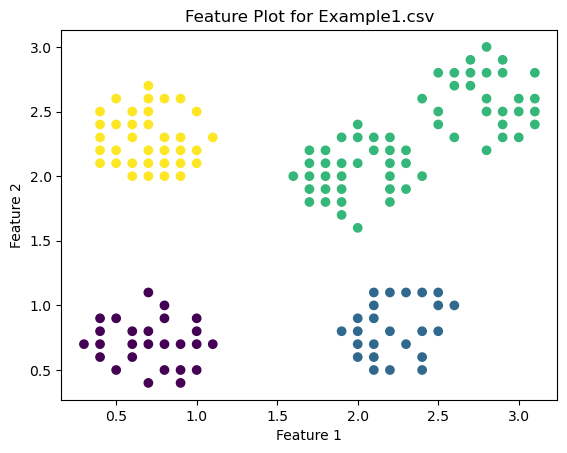

   0     1     2     3     4     5     6     7     8     9     ...  2170  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   4.0   
1   8.5   8.6   8.7   8.8   8.9   9.0   9.1   8.3   8.4   8.5  ...   1.1   
2   0.9   0.9   0.9   0.9   0.9   0.9   0.9   1.0   1.0   1.0  ...  11.5   

   2171  2172  2173  2174  2175  2176  2177  2178  2179  
0   4.0   4.0   4.0   4.0   4.0   4.0   4.0   4.0   4.0  
1   1.2   0.5   0.7   0.9   1.0   1.0   1.1   0.9   1.0  
2  11.5  11.6  11.6  11.6  11.6  11.7  11.7  11.8  11.8  

[3 rows x 2180 columns]


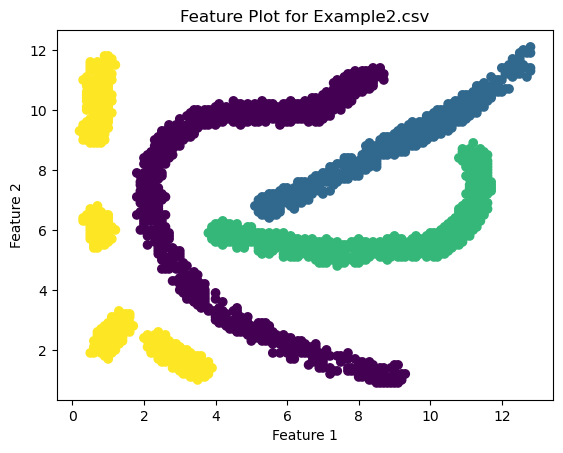

   0     1     2     3     4     5     6     7     8     9     ...  3918  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   4.0   
1   5.9   6.4   4.9   5.1   5.3   5.4   5.5   5.6   5.7   5.9  ...   1.9   
2   1.4   1.4   1.5   1.5   1.5   1.5   1.5   1.5   1.5   1.5  ...  12.7   

   3919  3920  3921  3922  3923  3924  3925  3926  3927  
0   4.0   4.0   4.0   4.0   4.0   4.0   4.0   4.0   4.0  
1   2.0   1.1   1.2   1.3   1.4   1.6   1.7   1.8   2.0  
2  12.7  12.8  12.8  12.8  12.8  12.8  12.8  12.8  12.8  

[3 rows x 3928 columns]


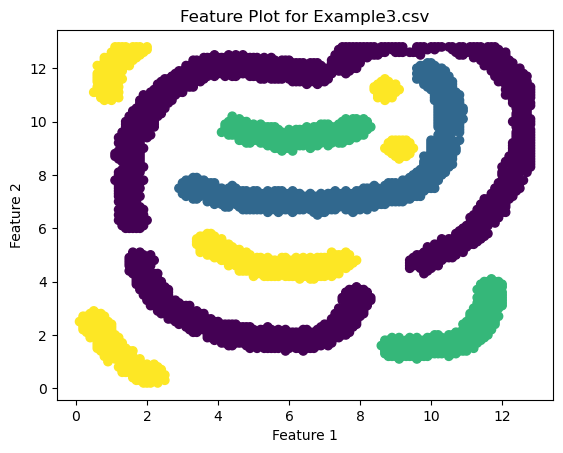

In [14]:
# Define the file names
file_names = ['Example1.csv', 'Example2.csv', 'Example3.csv']

# Iterate over each file
for file_name in file_names:
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv("./Examples/"+file_name, header=None)
    print(df)
    # Get the class number and feature vectors
    class_number = df.iloc[0, :].astype(int)
    features = df.iloc[1:3, :].values
    
    # Plot the features with different colors for the classes
    plt.scatter(features[0], features[1], c=class_number)
    
    # Set labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Feature Plot for {file_name}')
    
    # Show the plot
    plt.show()

### 1. b)

     0    1    2    3    4
0    1  5.1  3.5  1.4  0.2
1    1  4.9  3.0  1.4  0.2
2    1  4.7  3.2  1.3  0.2
3    1  4.6  3.1  1.5  0.2
4    1  5.0  3.6  1.4  0.2
..  ..  ...  ...  ...  ...
145  3  6.7  3.0  5.2  2.3
146  3  6.3  2.5  5.0  1.9
147  3  6.5  3.0  5.2  2.0
148  3  6.2  3.4  5.4  2.3
149  3  5.9  3.0  5.1  1.8

[150 rows x 5 columns]


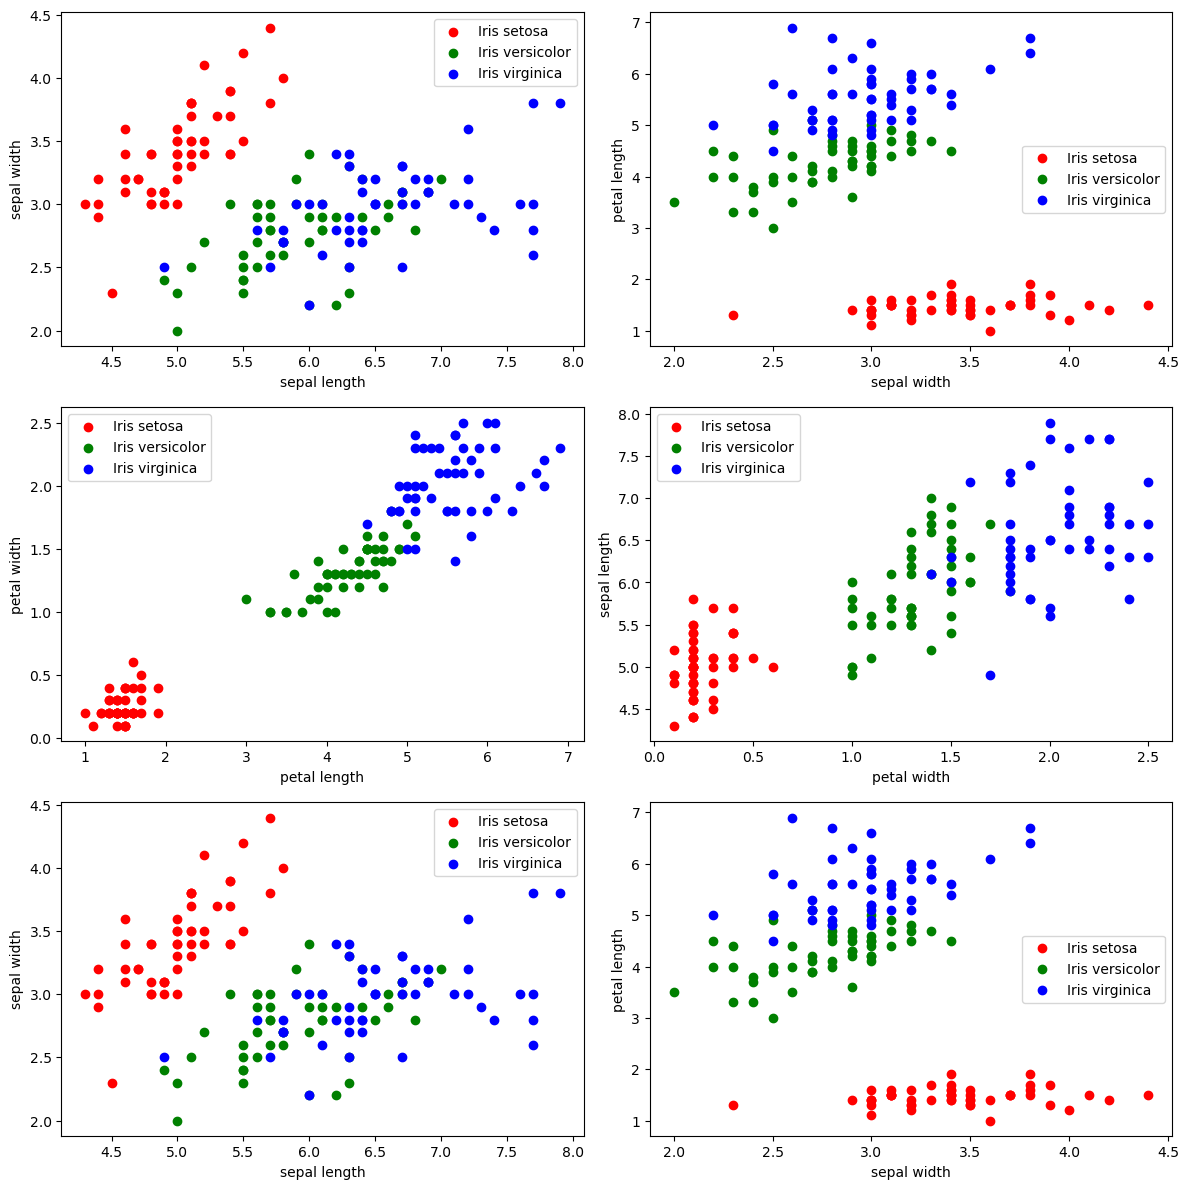

In [17]:
# Load the Iris data set from the CSV file
df = pd.read_csv('./FisherIris/iris-numclass.csv',header=None)
print(df)  
# Extract the class numbers and feature vectors
class_numbers = df.iloc[:, 0].astype(int)
features = df.iloc[:, 1:]

# Define the class names and colors
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
class_colors = ['red', 'green', 'blue']

# Define the feature names
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Create subplots for each feature combination
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Iterate over each feature combination
for i, ax in enumerate(axes.flat):
    x_index = i % 4
    y_index = (i + 1) % 4
    
    # Select the corresponding features
    x = features.iloc[:, x_index]
    y = features.iloc[:, y_index]
    
    # Create a scatter plot with colors representing the classes
    for class_number, class_name, class_color in zip(range(3), class_names, class_colors):
        ax.scatter(x[class_numbers == class_number+1], y[class_numbers == class_number+1], c=class_color, label=class_name)
    
    ax.set_xlabel(feature_names[x_index])
    ax.set_ylabel(feature_names[y_index])
    ax.legend()

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

### 2. a)

In [18]:
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('anthrokids.csv')

# Preprocess the data by removing NaN values and rounding the age column
df = df.dropna()
df['age'] = df['age'].round().astype(int)

# Split the data into male and female datasets
male_df = df[df['gender'] == 'M']
female_df = df[df['gender'] == 'F']

# Extract age (classes) and height (features) for male and female datasets
male_ages = male_df['age']
male_heights = male_df['height']
female_ages = female_df['age']
female_heights = female_df['height']

### 2. b)

In [19]:
# Split the male dataset into training and test datasets
male_age_train, male_age_test, male_height_train, male_height_test = train_test_split(
    male_ages, male_heights, test_size=0.33, random_state=42)

# Split the female dataset into training and test datasets
female_age_train, female_age_test, female_height_train, female_height_test = train_test_split(
    female_ages, female_heights, test_size=0.33, random_state=42)

### 2. c)

In [21]:
from scipy.stats import norm

# Define the range of age classes to consider
age_classes = range(3, 19)

# Initialize dictionaries to store the parameters and prior probabilities
male_params = {}
female_params = {}
male_priors = {}
female_priors = {}

# Iterate over the age classes and estimate the parameters and priors
for age_class in age_classes:
    # Male dataset
    male_params[age_class] = norm.fit(male_height_train[male_age_train == age_class])
    male_priors[age_class] = np.sum(male_age_train == age_class) / len(male_age_train)
    
    # Female dataset
    female_params[age_class] = norm.fit(female_height_train[female_age_train == age_class])
    female_priors[age_class] = np.sum(female_age_train == age_class) / len(female_age_train)

### 2. d)

In [25]:
male_predictions = []
female_predictions = []

# Iterate over the test data and classify each sample
for age, height in zip(male_age_test, male_height_test):
    male_posteriors = []
    
    # Compute the posterior probability for each age class
    for age_class in age_classes:
        # Calculate the likelihood using the normal distribution parameters
        likelihood = norm.pdf(height, loc=male_params[age_class][0], scale=male_params[age_class][1])
        
        # Calculate the posterior probability
        posterior = likelihood * male_priors[age_class]
        male_posteriors.append(posterior)
    
    # Make a decision based on the maximum posterior probability
    predicted_age = age_classes[np.argmax(male_posteriors)]
    male_predictions.append(predicted_age)

# Repeat the above steps for the female dataset
for age, height in zip(female_age_test, female_height_test):
    female_posteriors = []
    
    # Compute the posterior probability for each age class
    for age_class in age_classes:
        # Calculate the likelihood using the normal distribution parameters
        likelihood = norm.pdf(height, loc=female_params[age_class][0], scale=female_params[age_class][1])
        
        # Calculate the posterior probability
        posterior = likelihood * female_priors[age_class]
        female_posteriors.append(posterior)
    
    # Make a decision based on the maximum posterior probability
    predicted_age = age_classes[np.argmax(female_posteriors)]
    female_predictions.append(predicted_age)

### 2. e)

In [26]:
male_accuracy = np.sum(male_predictions == male_age_test) / len(male_age_test)
female_accuracy = np.sum(female_predictions == female_age_test) / len(female_age_test)

print(f"Male recognition rate: {male_accuracy*100:.2f}%")
print(f"Female recognition rate: {female_accuracy*100:.2f}%")

Male recognition rate: 33.97%
Female recognition rate: 32.69%


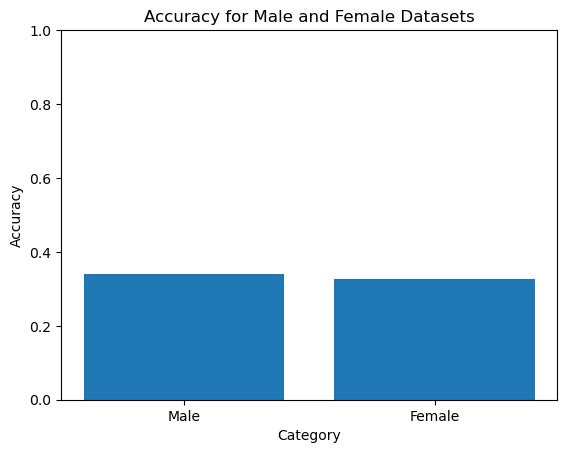

In [27]:
import matplotlib.pyplot as plt

# Define the categories (e.g., male and female)
categories = ['Male', 'Female']

# Define the accuracies for each category
accuracies = [male_accuracy, female_accuracy]

# Plot the accuracies
plt.bar(categories, accuracies)
plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.title('Accuracy for Male and Female Datasets')
plt.ylim(0, 1)  # Set the y-axis limits
plt.show()

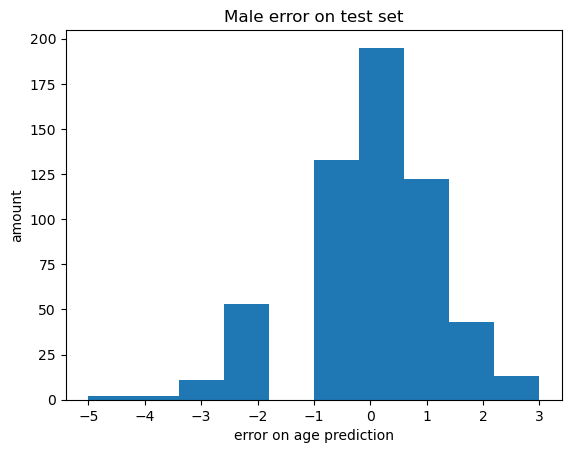

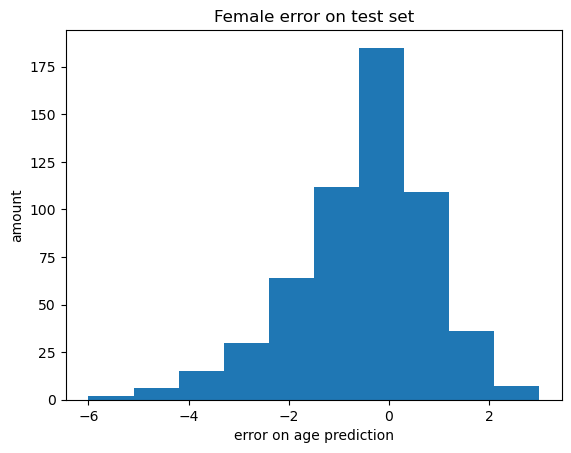

In [36]:
# Look at the distribution of errors for males
male_error = male_predictions - male_age_test
plt.hist(male_error)
plt.title("Male error on test set")
plt.ylabel("amount")
plt.xlabel("error on age prediction") 
plt.show()

# Look at the distribution of errors for females
female_error = female_predictions - female_age_test
plt.hist(female_error)
plt.title("Female error on test set")
plt.ylabel("amount")
plt.xlabel("error on age prediction") 
plt.show()

### 3. a)